# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [10]:
# number of callbacks for white-sounding names and black-sounding names:
print(sum(data[data.race=='w'].call), sum(data[data.race=='b'].call))
print(len(data[data.race=='w']), len(data[data.race=='b']))

235.0 157.0
2435 2435


In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [8]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here
    
1. The central limit theorem (CLT) does apply here, as the number of total resumes for each distribution exceeds 2000. That is more than enough to assume the distribution is roughly Gaussian (normal) even if it's not actually. As such, a Z-test is an appropriate statistical test to use.

2. The null hypothesis in this case is that there is no statistical difference between the number of callbacks for white and black sounding names. The alternate hypothesis is that there is a difference.
</p>
</div>

# Question 3:

In [5]:
# Separate data into two sets, the white- and black-sounding name resumes.
w = data[data.race=='w']
b = data[data.race=='b']

In [12]:
w.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,...,2435.000000,2435.000000,2435.00000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,3.620945,3.664476,7.856263,0.054209,0.408624,0.092402,0.450103,214.530595,3.475154,0.558111,...,0.106776,0.436961,0.07269,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.696609,1.219345,5.079228,0.226477,0.491681,0.289653,0.497606,148.255302,2.033334,0.496714,...,0.308892,0.496112,0.25968,0.275874,0.171694,0.278954,0.410185,0.442884,0.361813,0.371340
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,26.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
b.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,...,2435.000000,2435.000000,2435.00000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,3.616016,3.658316,7.829569,0.051335,0.414374,0.101848,0.445996,216.744969,3.487885,0.560986,...,0.106776,0.437372,0.07269,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.733060,1.219150,5.010764,0.220725,0.492715,0.302511,0.497177,148.021857,2.043125,0.496369,...,0.308892,0.496164,0.25968,0.275874,0.171694,0.278954,0.410185,0.442884,0.361813,0.371340
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Apparently the problem is mischaracterized here. It states that "identical" resumes are assigned black or white sounding names, but the distributions of resume attributes are *not* identical for white and black resumes. They are certainly very close to each other, but they are not identical.

This problem is interesting, as it's just a binary classification problem with an imbalanced dataset. But we want to know if this imbalance is different for two separate subsets within the data. This is represented as a Bernoulli Distribution, in which you have just 0s and 1s, and the probability of getting a 0 or 1 is not (necessarily) 50%. The probability of getting a 1 is p, and the probability of getting a 0 is 1-p, defined as q. As such, the distribution means are given by the probability p. Let's calculate these means for both the black- and white-sounding names:

In [15]:
# Calculate the means (p) for each distribution as a percentage:
mean_w = sum(w.call)/len(w.call)
mean_b = sum(b.call)/len(b.call)
print(mean_w*100., mean_b*100.)

9.650924024640657 6.447638603696099


These are some small means, which makes sense given the imbalanced problem. To perform a z-test, we also need to calculate the variance of the Bernoulli Distributions here, which is just the product of both p and q probabilities:

In [17]:
# Calculate the variances for each distribution (pq):
var_w = mean_w * (1-mean_w)
var_b = mean_b * (1-mean_b)
print(var_w, var_b)

0.08719520679346794 0.060319181680573764


In [20]:
# Calculate the z-statistic between the two distributions to test if they have the same mean:
import scipy.stats as st

N = len(w.call)   # Same N for both distributions

z_stat = (mean_b - mean_w) / np.sqrt((var_b + var_w) / N)
print('Z value = {}'.format(z_stat))

# Figure out the 95% confidence intervals:
print('95% confidence interval z-table range: ')
print([st.norm.ppf(.025), st.norm.ppf(.975)])

# Calculate the p-value:
p_val = st.norm.cdf(z_stat)
print('p value: {}'.format(p_val))

Z value = -4.11555043573
95% confidence interval z-table range: 
[-1.9599639845400545, 1.959963984540054]
p value: 1.931282603761311e-05


Using the z-test, we can very clearly reject the null hypothesis, meaning that there is definitely a statistical bias in the callback process regarding racial names. The question asks us to examine the question again using a bootstrap method, so that will be the next thing to do:

In [38]:
def bootstrap_1d(data, func):
    """
    This will take a 1d array of data and create a bootstrap replicate
    of the supplied statistical function (mean, median, std, etc.).
    
    """
    
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates of the supplied statistical function.
    Size here is how many total replicates you wish to draw.
    
    """

    # Initialize array of replicates to be filled:
    bs_replicates = np.empty(size)
    
    # Generate all the replicates and store them
    for i in range(size):
        bs_replicates[i] = bootstrap_1d(data, func)
    
    return bs_replicates

# Let's draw a sufficient number of bootstrap replicates of the mean, which is a sum for this distribution:
bs_reps = draw_bs_reps(w.call, np.sum, size=1000) / len(w.call)
rep_mean = np.mean(bs_reps)*100.0
print('Replicate mean (as a percentage): {}'.format(rep_mean))   # Check the mean of the replicates

Replicate mean (as a percentage): 9.667967145790554


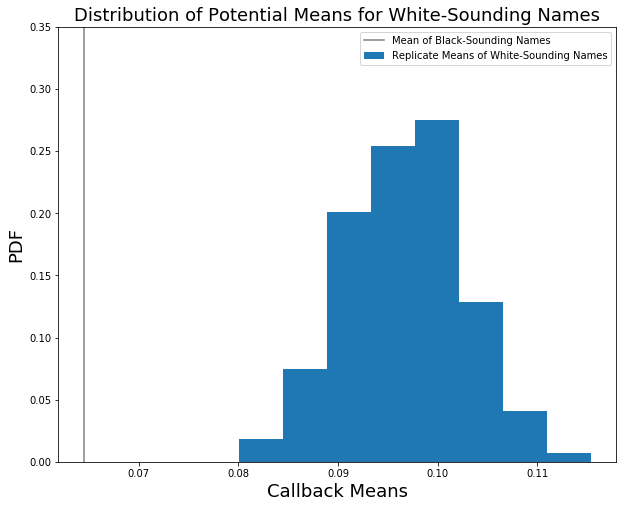

In [39]:
# Plot out the replicate mean distribution compared to the mean of black-sounding names:
import matplotlib.pyplot as plt

weights_bs = np.ones_like(bs_reps)/float(len(bs_reps))
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(bs_reps, bins=8, weights=weights_bs)
_ = axes.plot(np.array([mean_b, mean_b]), np.array([0.0, 0.35]), color='black', alpha=0.5)
_ = axes.set_ylim([0.0, 0.35])
_ = axes.set_xlabel('Callback Means', fontsize=18)
_ = axes.set_ylabel('PDF', fontsize=18)
_ = plt.legend(['Mean of Black-Sounding Names', 'Replicate Means of White-Sounding Names'], fontsize=10)
_ = plt.title('Distribution of Potential Means for White-Sounding Names', fontsize=18)
plt.show()

In [40]:
# Calculate p_val for rejecting null hypothesis:

unit_distance = rep_mean - mean_b
lower_vals = bs_reps[np.where(bs_reps <= (rep_mean - unit_distance))]
upper_vals = bs_reps[np.where(bs_reps >= (rep_mean + unit_distance))]
p_val = (np.sum(lower_vals) + np.sum(upper_vals)) / len(bs_reps)
print(p_val, len(lower_vals), len(upper_vals))

0.0 0 0


As can be clearly seen from the plot, even with 1000 bootstrap replacement means, the callback mean for white-sounding names never gets close to being as low as the mean for black-sounding names. As such, the p-value is zero. We can therefore easily reject the null hypothesis, as we were able to do for the z-test.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here 

4. According to these results, it is clear that the probability for employers to call back a candidate drops significantly if the candidate has a black-sounding name compared to a white-sounding name. That means that race clearly plays a factor in the hiring process, even if not done intentionally.

5. The above answer notwithstanding, it cannot be said that race is the only factor at play in this analysis. There are a number of additional factors that can be at play. For example, were demographics of the hiring managers controlled for? How about their geographic location? I also showed in the beginning of this analysis that the resumes were not, in fact, identical, which means the resumes themselves were not a control factor. In order to determine if this is the most important factor, we would need to identify all of the relevant information, much of which can be found in the data (and likely some that isn't and would therefore need to be acquired). Once all the data is acquired and cleaned, a feature importance analysis would help figure out whether or not race is the most important factor. This could involve something like PCA, Regularization techniques (Lasso or Ridge Regression), or some modeling with interpretable models (Logistic Regression, Random Forest, Decision Trees, etc.).
    
</p>
</div>